# SEDPNR model
The SEDPNR model is the following system of linear ODEs
\begin{align}
    \frac{dS}{dt} &= \mu_1 E + \mu_2 D - \alpha S \\
    \frac{dE}{dt} &= \alpha S - (\beta_1 + \beta_2 + \gamma + \mu_1)E \\
    \frac{dD}{dt} &= \gamma E - (\beta_3 + \beta_4 + \mu_2)D \\
    \frac{dP}{dt} &= \beta_1 E + \beta_3 D - \lambda_1 P \\
    \frac{dN}{dt} &= \beta_2 E + \beta_4 D - \lambda_2 N \\
    \frac{dR}{dt} &= \lambda_1 P + \lambda_2 N
\end{align}
which models the spread of misinformation through a population. This notebook will explore some numerical analysis of this model.

In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Initialise Params
params = dict()
params['mu_1'] = 1
params['mu_2'] = 10
params['beta_1'] = 0.4  # probability; transition from the Exposed state to the Doubter state
params['beta_2'] = 0.5  # probability; transition from the Exposed state to the Infected state
params['beta_3'] = 1
params['beta_4'] = 10
params['alpha'] = 1   # Transition rate between susceptible to exposed 
params['gamma'] = 1     # transition rate from Doubter to Infected
params['lambda_1'] = 1  #  transition rate from the Infected state to the Restrained state
params['lambda_2'] = 10 

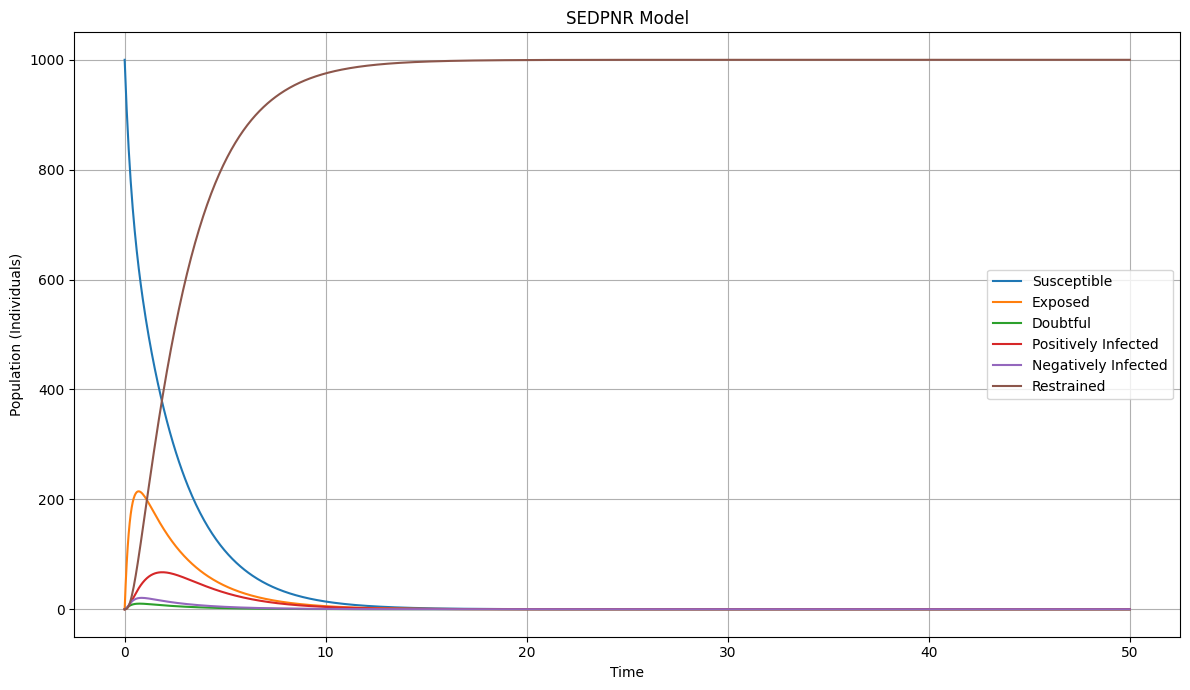

In [4]:
def SEDPNR(x,t,params = params):
    s,e,d,p,n,r = x
    mu_3 = params['beta_1'] + params['beta_2'] + params['gamma'] + params['mu_1']
    mu_4 = params['beta_3'] + params['beta_4'] + params['mu_2']

    dxdt = [params['mu_1']*e + params['mu_2']*d - params['alpha']*s, 
            params['alpha']*s - mu_3*e,
            params['gamma']*e - mu_4*d,
            params['beta_1']*e + params['beta_3']*d - params['lambda_1']*p,
            params['beta_2']*e + params['beta_4']*d - params['lambda_2']*n,
            params['lambda_1']*p + params['lambda_2']*n
            ]
    return dxdt

# Initial Condition
x0 = [1000,0.0,0.0,0.0,0.0,0.0]
t = np.linspace(0, 50, 1000)
sol = odeint(SEDPNR, x0, t)
fig, ax = plt.subplots(1,figsize = (12,7))
ax.plot(t, sol[:, 0], label='Susceptible')
ax.plot(t, sol[:, 1], label='Exposed')
ax.plot(t, sol[:, 2], label='Doubtful')
ax.plot(t, sol[:, 3], label='Positively Infected')
ax.plot(t, sol[:, 4], label='Negatively Infected')
ax.plot(t, sol[:, 5], label='Restrained')
ax.set_title(f'SEDPNR Model')
ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Population (Individuals)')
ax.grid()
plt.tight_layout()
plt.show()